# LAB-02 - Regresión Logística

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [ ]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
data = pd.read_csv('/content/drive/MyDrive/laboratorios_IA/lab_4/lab_2_regularizacion/diabetes_data.csv', delimiter=',')


In [ ]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 30)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [ ]:
data.head(15)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(70692, 18)

In [ ]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  flo

In [ ]:
# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
# X_train, X_test, y_train, y_test = train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# 20%
# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :17]
y_test = test_data.iloc[:, 17]

# 80%
# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.iloc[:, :17]
y_train = train_data.iloc[:, 17]
m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
61789  11.0  1.0       0.0        1.0  25.0     0.0                   0.0   
46280  11.0  0.0       1.0        1.0  27.0     1.0                   1.0   
18465   8.0  0.0       0.0        1.0  27.0     1.0                   0.0   
45540  12.0  0.0       1.0        1.0  25.0     0.0                   0.0   
28119   5.0  0.0       1.0        1.0  26.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
37194  11.0  1.0       0.0        1.0  28.0     1.0                   0.0   
6265    9.0  1.0       1.0        1.0  25.0     0.0                   0.0   
54886  11.0  0.0       1.0        1.0  23.0     0.0                   0.0   
860    10.0  1.0       0.0        1.0  28.0     1.0                   0.0   
15795   2.0  1.0       0.0        1.0  23.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  

# **1.2 IMPLEMENTACIÓN**

## **1.2.1 Normalización de los datos:**

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [ ]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm, mu, sigma = featureNormalize(X_train)

In [ ]:
# Mostrar datos ya normalizados
X_norm

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
61789,0.849372,1.086887,-1.050781,0.160486,-0.687371,-0.951909,-0.414917,0.647525,-1.260864,0.516538,-0.213299,1.048676,-0.459261,-0.276717,-0.579031,-0.256732,0.880716
46280,0.849372,-0.920059,0.951673,0.160486,-0.405776,1.050520,2.410123,-1.544341,-1.260864,-1.935966,-0.213299,1.948107,-0.459261,2.412148,1.727022,-0.256732,0.880716
18465,-0.202164,-0.920059,-1.050781,0.160486,-0.405776,1.050520,-0.414917,0.647525,-1.260864,-1.935966,-0.213299,1.048676,0.768253,2.113385,1.727022,-0.256732,0.880716
45540,1.199884,-0.920059,0.951673,0.160486,-0.687371,-0.951909,-0.414917,0.647525,-1.260864,-1.935966,-0.213299,0.149245,-0.459261,-0.575480,-0.579031,-0.256732,-1.135440
28119,-1.253701,-0.920059,0.951673,0.160486,-0.546574,1.050520,-0.414917,0.647525,-1.260864,-1.935966,4.688249,0.149245,-0.459261,-0.376305,1.727022,-0.256732,0.880716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.849372,1.086887,-1.050781,0.160486,-0.264979,1.050520,-0.414917,-1.544341,0.793107,0.516538,-0.213299,0.149245,-0.459261,-0.575480,-0.579031,-0.256732,0.880716
6265,0.148348,1.086887,0.951673,0.160486,-0.687371,-0.951909,-0.414917,0.647525,0.793107,0.516538,-0.213299,-0.750186,-0.459261,-0.575480,-0.579031,-0.256732,0.880716
54886,0.849372,-0.920059,0.951673,0.160486,-0.968966,-0.951909,-0.414917,0.647525,0.793107,0.516538,-0.213299,-0.750186,-0.459261,-0.376305,-0.579031,3.895107,0.880716
860,0.498860,1.086887,-1.050781,0.160486,-0.264979,1.050520,-0.414917,-1.544341,0.793107,0.516538,-0.213299,-0.750186,-0.459261,-0.575480,-0.579031,-0.256732,0.880716


Agregamos la columna de unos

In [ ]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m, n = X_train.shape

# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
X_ready

array([[ 1.        ,  0.84937208,  1.08688719, ..., -0.57903136,
        -0.25673233,  0.8807157 ],
       [ 1.        ,  0.84937208, -0.92005868, ...,  1.72702219,
        -0.25673233,  0.8807157 ],
       [ 1.        , -0.20216445, -0.92005868, ...,  1.72702219,
        -0.25673233,  0.8807157 ],
       ...,
       [ 1.        ,  0.84937208, -0.92005868, ..., -0.57903136,
         3.89510739,  0.8807157 ],
       [ 1.        ,  0.4988599 ,  1.08688719, ..., -0.57903136,
        -0.25673233,  0.8807157 ],
       [ 1.        , -2.30523751,  1.08688719, ..., -0.57903136,
        -0.25673233, -1.13544019]])

# **1.3 FUNCIÓN SIGMOIDEA**

In [ ]:
# Defenimos la función sigmoidea o funcion logistica que calcula la hipotesis ho(x)
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

# **1.2.2 FUNCIÓN DE COSTO Y GRADIENTE**

Se implementa la funcion cost y gradient, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

##  aplicamos la regularizacion L2


In [ ]:
def calcularCostoReg(theta, X, y, lambda_reg):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))

  # Cálculo del costo sin regularización
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

  # Cálculo del término de regularización
  regularizacion = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)

  # Coste final con regularización
  J += regularizacion

  return J


## Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la **sigmoid()**

In [26]:
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_reg):
  m = y.shape[0]

  # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    h = sigmoid(X.dot(theta.T))

    # Actualización de theta con regularización L2
    theta = theta - (alpha / m) * ((h - y).dot(X) + (lambda_reg * theta))

    J_history.append(calcularCostoReg(theta, X, y, lambda_reg))
  return theta, J_history


thetas calculados por el descenso por el gradiente regularizado: [-0.03754102  0.44197102  0.10775902  0.28268517  0.20164441  0.5249879
  0.00774085  0.09396013 -0.01968193 -0.03048679 -0.05189999 -0.15982055
  0.68177159 -0.02802819 -0.0760173   0.07703094  0.04151804  0.37545793]
Con un costo de: 0.5134796862089405 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


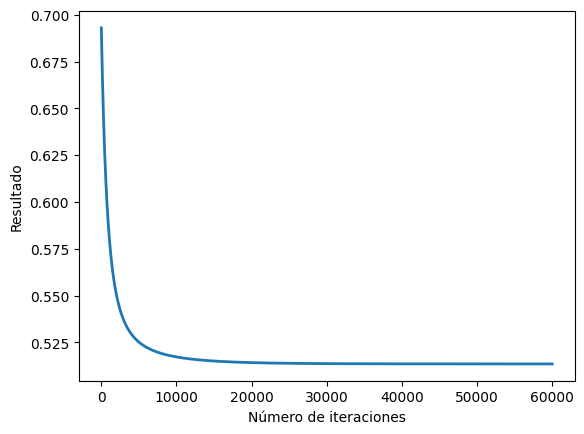

In [27]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 60000
lambda_reg = 0.1  # Elegir un valor adecuado para lambda

# Inicializa theta y ejecuta el descenso por el gradiente regularizado
theta = np.zeros(18)
theta, J_history = descensoGradienteReg(theta, X_ready, y_train, alpha, num_iters, lambda_reg)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente regularizado: {:s}'.format(str(theta)))
print('=' * 100)
# Muestra el último costo, que debería ser el mejor costo
print(f"Con un costo de: {J_history[-1]} ")

print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')
plt.show()


In [29]:
# Realizando algunas pruebas de que una perosna tenga diabetes

X_array = [1, 10.0,	1.0,	1.0,	1.0,	29.0,	1.0,	1.0,	0.0,	1.0,	1.0,	0.0,	2.0,	0.0,	0.0,	1.0,	0.0,	0.0]
resuldato = sigmoid(np.dot(X_array, theta))

print(f"tenemos los siguientes datos de una perosna aleatoria: {X_array}")
print('la persona tiene diabetees 1 (si)  0 (no): {:.0f}'.format(resuldato))

tenemos los siguientes datos de una perosna aleatoria: [1, 10.0, 1.0, 1.0, 1.0, 29.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0]
la persona tiene diabetees 1 (si)  0 (no): 1


## Ejemplos de Predicciones

In [ ]:
data.head(300)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6.0,0.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
296,2.0,0.0,0.0,0.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
297,8.0,0.0,1.0,1.0,19.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
298,10.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,1.0,0.0


In [34]:
# Podemos hacer predicciones con varios ejemplos, en este caso 14 ejemplos donde se harán la
# predicciones correspondientes

X_columnas = ['Age',	'Sex',	'HighChol',	'CholCheck',	'BMI',	'Smoker',	'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies',	'HvyAlcoholConsump',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Stroke',	'HighBP',	'Diabetes', 'Diabetes(Si/No)']

matriz_datos = np.array([
    [4.0,	1.0,	0.0,	1.0,	26.0,	0.0,	0.0,	1.0,	0.0,	1.0,	0.0,	3.0,	5.0,	30.0,	0.0,	0.0,	1.0],
    [6.0,	1.0,	0.0,	1.0,	31.0,	1.0,	0.0,	0.0,	1.0,	1.0,	0.0,	4.0,	0.0,	0.0,	0.0,	0.0,	0.0],
    [10.0,	0.0,	1.0,	1.0,	29.0,	1.0,	0.0,	1.0,	1.0,	0.0,	0.0,	1.0,	0.0,	0.0, 1.0,	0.0,	0.0],
    [6.0,	1.0,	0.0,	1.0,	27.0,	1.0,	0.0,	0.0,	1.0,	1.0,	0.0,	3.0,	0.0,	6.0,	0.0,	0.0,	0.0],
    [12.0,	0.0,	1.0,	1.0,	24.0,	1.0,	1.0,	1.0,	1.0,	1.0,	0.0,	3.0,	0.0,	4.0,	0.0,	0.0,	1.0],
    [4.0,	1.0,	0.0,	1.0,	21.0,	0.0,	0.0,	1.0,	1.0,	1.0,	0.0,	1.0,	0.0,	0.0,	0.0,	0.0,	0.0],
    [11.0,	1.0,	1.0,	1.0,	28.0,	1.0,	0.0,	1.0,	1.0,	1.0,	0.0,	3.0,	0.0,	3.0,	0.0,	0.0,	1.0],
    [10.0,	0.0,	1.0,	1.0,	29.0,	1.0, 0.0,	1.0,	1.0,	0.0,	0.0,	1.0,	0.0,	0.0,	1.0,	0.0,	0.0],
    [10.0,	1.0,	1.0,	1.0,	31.0,	1.0,	0.0,	1.0,	0.0,	0.0,	0.0,	1.0,	0.0,	30.0,	0.0,	0.0,	1.0],
    [6.0,	0.0,	0.0,	1.0,	27.0,	0.0,	0.0,	1.0,	1.0,	1.0,	0.0,	2.0,	5.0,	0.0,	0.0,	0.0,	0.0],
    [2.0	,0.0	,0.0	,0.0	,23.0	,1.0	,0.0	,1.0	,1.0	,1.0	,0.0	,3.0	,0.0,	0.0	,0.0,	0.0	,0.0],
    [8.0,	0.0,	0.0,	1.0,	29.0,	1.0,	0.0,	1.0,	1.0,	1.0,	0.0,	2.0,	0.0,	0.0,	0.0,	0.0,	0.0	],
])

datos_tabla = matriz_datos.copy()

# Creamos el vector para guardar cada Y predicha
y_pred = []

matriz_datos = (matriz_datos - mu.values) / sigma.values
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 14 ejemplos a predecir
# Calculamos la Y predicha de cada fila de la matriz_datos
for i in matriz_datos:
  y_pred.append(sigmoid(np.dot(i, theta)))  #X.dot(theta.T)


# Convertimos la lista a un array unidimensional
y_pred = np.array(y_pred)

# Verificamos con el umbral para definir si la persona tiene diabetes
y_pred_umbral = (y_pred >= 0.5).astype(int)



In [35]:
# Convertimos la lista a un array unidimensional
# y_pred = np.array(y_pred)
y_pred_umbral = np.array(y_pred_umbral)

# Juntamos los datos de datos_tabla con y_pred y y_pred_umbral en uno solo
tabla_predicciones = np.column_stack((datos_tabla, y_pred, y_pred_umbral))
tabla_predicciones = pd.DataFrame(tabla_predicciones, columns=X_columnas)

# mostramos los datos tabla de datos junto con los y_pred y y_pred_umbral
tabla_predicciones

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Diabetes(Si/No)
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.267965,0.0
1,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.443000,0.0
2,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.271861,0.0
3,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.234461,0.0
4,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.704470,1.0
5,4.0,1.0,0.0,1.0,21.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040069,0.0
6,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.724686,1.0
7,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.271861,0.0
8,10.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,1.0,0.448620,0.0
9,6.0,0.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.114743,0.0


## **Validaciones**

Para las validaciones correspondientes se hizo el uso del 80% y 20%, donde el 80% son para el entrenamiento y el 20% para la fase de prueba.

In [36]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

In [37]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready)

[[ 1.          0.4988599  -0.92005868 ... -0.57903136 -0.25673233
  -1.13544019]
 [ 1.          1.55039643 -0.92005868 ...  1.72702219 -0.25673233
  -1.13544019]
 [ 1.         -0.20216445  1.08688719 ... -0.57903136 -0.25673233
   0.8807157 ]
 ...
 [ 1.         -0.20216445  1.08688719 ...  1.72702219 -0.25673233
  -1.13544019]
 [ 1.          1.55039643 -0.92005868 ... -0.57903136 -0.25673233
   0.8807157 ]
 [ 1.          0.14834773  1.08688719 ...  1.72702219 -0.25673233
  -1.13544019]]


In [38]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}".format(
    'X[:, 0]','X[:, 1]','X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]','X[:, 7]','X[:, 8]','X[:, 9]',
    'X[:, 10]','X[:, 11]','X[:, 12]','X[:, 13]', 'X[:, 14]','X[:, 15]','X[:, 16]','X[:, 17]', 'Y_predicha', 'Y_umbral'
))


print("=" * 155)

for i in range(20):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.0f}{:10.0f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12],
        X_test_ready[i, 13], X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], y_predicha[i], y_umbral[i]
    ))



 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]Y_predicha
   1.000   0.499    -0.920     0.952   0.160  -0.969   1.051  -0.415 0.648    -1.261     0.517    -0.213     1.049    -0.459    -0.575    -0.579        -0        -1
   1.000   1.550    -0.920    -1.051   0.160   0.439   1.051  -0.415-1.544     0.793     0.517    -0.213     0.149    -0.459    -0.277     1.727        -0        -1
   1.000  -0.202     1.087     0.952   0.160  -0.406   1.051  -0.415 0.648     0.793     0.517    -0.213    -0.750    -0.459    -0.078    -0.579        -0         1
   1.000  -0.553     1.087     0.952   0.160  -0.124   1.051  -0.415-1.544     0.793    -1.936    -0.213     0.149    -0.459    -0.078    -0.579        -0        -1
   1.000  -0.903     1.087    -1.051   0.160   2.410  -0.952  -0.415 0.648     0.793     0.517    -0.213     1.049     3.223     0.420     1.727        -0         1

## Calculamos que tal de precición tiene los datos de entrenamiento

Calculamos con el metodo np.mean, la media(promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [40]:
# Mostramos la precición de entrenamiento
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test) * 100))

Precición de entrenamiento: 74.63 % 


# **- Conclución**

Segun los resultados tanto de predicciones y la precición del entranamiento es de un 74.63 % lo que indica que esta por superior a los 50%
Por lo que podemos decir que el modelo es muy preciso en las predicciones de que una persona tenga diabetes
